In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils.chaotic_images as chaotic_images
from utils.utils import normalize_outbound_to_float64
from utils.experiments_functions import get_img_info_simple


### Henon map (Rosso)

In [46]:
# Generate Henon map textures with different dx and dy combinations
# such that dx * dy = 6

factors_of_6 = [(2, 2), (1, 6), (2, 3), (3, 2), (6, 1)]  # (dx, dy) pairs where dx*dy = 6

images = {'henon': chaotic_images.henon_texture(a=1.3),
               'logistic': chaotic_images.logistic_texture(r=3.999)}
images_data = []

for i in images:
    img = images[i]
    for dx, dy in factors_of_6:        
        # Get image information
        info = get_img_info_simple(img, dx, dy)
        info['image'] = i
        info['dx'] = dx
        info['dy'] = dy
        
        images_data.append(info)

# Convert to DataFrame
images_df = pd.concat(images_data, ignore_index=True)

# Display the analysis results
images_df

Smoothness  Curve structure   Entropy  Complexity     image  dx  dy
0   -0.190481        -0.285705  0.549983    0.348999     henon   2   2
1   -0.190481        -0.285705  0.295765    0.286244     henon   1   6
2   -0.190481        -0.285705  0.401117    0.376125     henon   2   3
3   -0.190481        -0.285705  0.295765    0.286244     henon   3   2
4   -0.190481        -0.285705  0.295765    0.286244     henon   6   1
5    0.038170        -0.066621  0.875505    0.172077  logistic   2   2
6    0.038170        -0.066621  0.999102    0.002149  logistic   1   6
7    0.038170        -0.066621  0.834871    0.359535  logistic   2   3
8    0.038170        -0.066621  0.731118    0.457942  logistic   3   2
9    0.038170        -0.066621  0.631836    0.485608  logistic   6   1

### Textures

In [2]:
images = {
    'henon': chaotic_images.henon_texture(),
    'logistic': chaotic_images.logistic_texture(),
    'tent_map': chaotic_images.tent_map_texture(),
    'lozi_map': chaotic_images.lozi_map_texture(),
    'ikeda_map': chaotic_images.ikeda_map_texture(),
    'arnolds_cat_map': chaotic_images.arnolds_cat_map_texture()
}

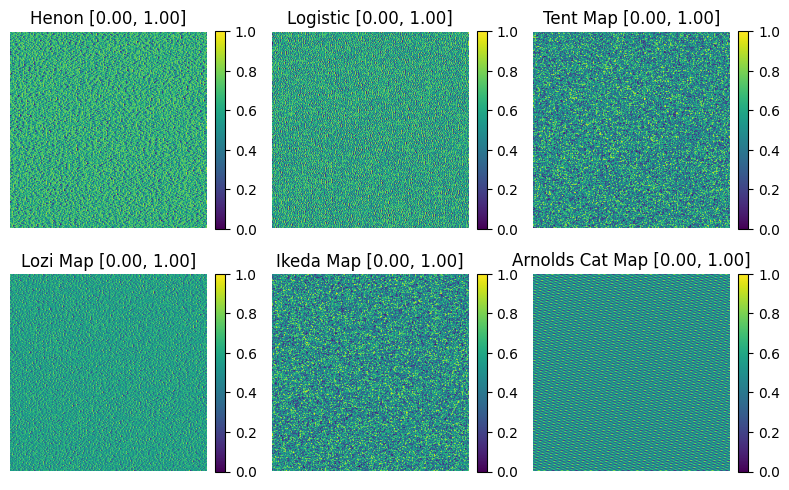

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(8,5))
axs = axs.flatten()

for i, (key, img) in enumerate(images.items()):
    im = axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"{key.replace('_', ' ').title()} [{img.min():.2f}, {img.max():.2f}]")
    axs[i].axis('off')
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [4]:
from utils.experiments_functions import get_img_info_simple
import pandas as pd

# Initialize an empty list to store the data
image_data_list = []

# Process each image
for key, image in images.items():
    info = get_img_info_simple(image, dx=6, dy=1)  # Using a fixed dx and dy for simplicity
    info['image_name'] = key
    image_data_list.append(info)

# Create a DataFrame from the collected data
image_data_df = pd.concat(image_data_list, ignore_index=True)

image_data_df

Smoothness  Curve structure   Entropy  Complexity  Shannon Entropy  \
0   -0.083845        -0.089258  0.555445    0.458808         0.555445   
1   -0.050027        -0.179577  0.541771    0.461247         0.541771   
2   -0.000431         0.002645  0.999066    0.002234         0.999066   
3   -0.087982        -0.143714  0.583584    0.469444         0.583584   
4    0.002276        -0.000738  0.999169    0.001990         0.999169   
5    0.060408         0.372503  0.522998    0.444121         0.522998   

   Fisher-Shannon Complexity       image_name  
0                   0.285494            henon  
1                   0.106726         logistic  
2                   0.003098         tent_map  
3                   0.248142         lozi_map  
4                   0.002773        ikeda_map  
5                   0.273088  arnolds_cat_map

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine do

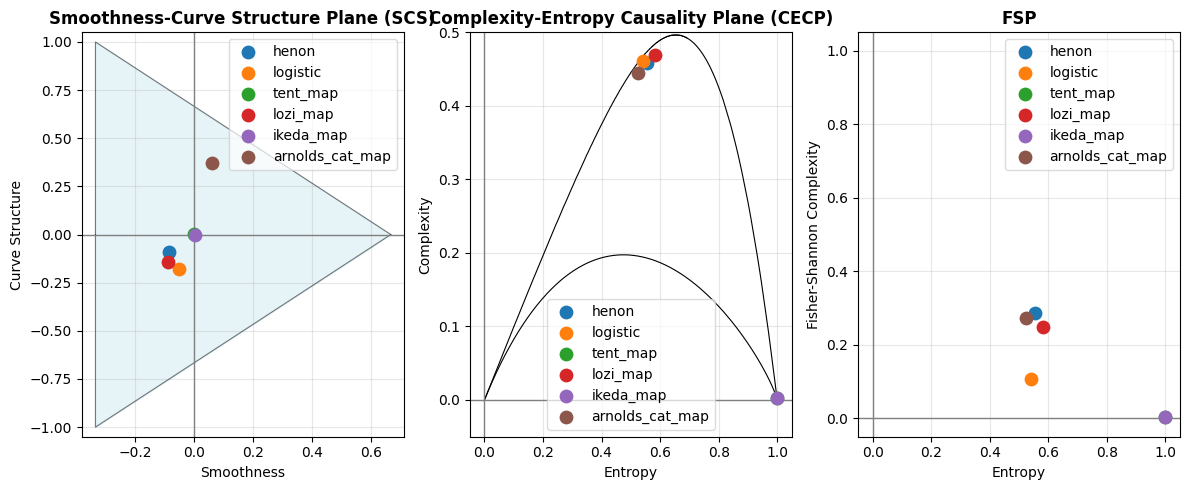

In [5]:
import matplotlib.pyplot as plt
from utils.utils import read_entropy_complexity_limits

# Define colors for each image
image_colors = {
    'henon': '#1f77b4',            # blue
    'logistic': '#ff7f0e',         # orange
    'tent_map': '#2ca02c',         # green
    'lozi_map': '#d62728',         # red
    'ikeda_map': '#9467bd',        # purple
    'arnolds_cat_map': '#8c564b'   # brown
}

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
df_cont, df_troz = read_entropy_complexity_limits('data/limits/unv/', N=720)

# Load SCSP limits for the smoothness-curve structure plot
df_scs = pd.read_csv('data/limits/SCSP/SCS_limits_steps1000.csv')

# Plot 1: SCS plane (Smoothness vs Curve Structure)
ax_scs = axes[0]
ax_scs.set_title('Smoothness-Curve Structure Plane (SCS)', fontweight='bold')
ax_scs.set_xlabel('Smoothness')
ax_scs.set_ylabel('Curve Structure')

# Plot 2: CECP plane (Entropy vs Complexity)
ax_cecp = axes[1]
ax_cecp.set_title('Complexity-Entropy Causality Plane (CECP)', fontweight='bold')
ax_cecp.set_xlabel('Entropy')
ax_cecp.set_ylabel('Complexity')

# Plot 3: FSP plane (Entropy vs Fisher-Shannon Complexity)
ax_fsp = axes[2]
ax_fsp.set_title('FSP', fontweight='bold')
ax_fsp.set_xlabel('Entropy')
ax_fsp.set_ylabel('Fisher-Shannon Complexity')

# Add CECP superior and inferior limits to the CECP plot
ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8)
ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8)


# Add SCS limits to the SCS plot
ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Superior'], color='black', linewidth=0.8, alpha=0.5)
ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], color='black', linewidth=0.8, alpha=0.5)
ax_scs.fill_between(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], df_scs['Curve_Structure_Superior'], color='lightblue', alpha=0.3, 
            )

# Plot the data points for each image
for _, row in image_data_df.iterrows():
    image_name = row['image_name']
    color = image_colors[image_name]
    
    # Plot on SCS plane
    ax_scs.scatter(row['Smoothness'], row['Curve structure'], 
                  color=color, s=80, label=image_name, zorder=10)
    
    # Plot on CECP plane
    ax_cecp.scatter(row['Entropy'], row['Complexity'], 
                   color=color, s=80, label=image_name, zorder=10)
    
    # Plot on FSP plane: 'Shannon Entropy' X 'Fisher-Shannon Complexity'
    ax_fsp.scatter(row['Shannon Entropy'], row['Fisher-Shannon Complexity'], 
                   color=color, s=80, label=image_name, zorder=10)

# Set reasonable axis limits with some buffer
ax_scs.set_xlim(-0.38, 0.71)
ax_scs.set_ylim(-1.05, 1.05)

ax_cecp.set_xlim(-0.05, 1.05)
ax_cecp.set_ylim(-0.05, 0.5)

ax_fsp.set_xlim(-0.05, 1.05)
ax_fsp.set_ylim(-0.05, 1.05)


# Add grid and reference lines to both plots
for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, lw=1, color='gray')
    ax.axvline(x=0, lw=1, color='gray')
    ax.set_aspect('auto')
    ax.legend(loc='best', framealpha=0.7)

# Adjust layout and display
plt.tight_layout()
# plt.savefig('results/chaotic_maps_analysis.png', bbox_inches='tight', dpi=300)
plt.show()


In [6]:
def plot_param_exploration(image_generator, param_name, param_values, fixed_params={}, title_prefix="", image_size=(128, 128)):
    fig, axes = plt.subplots(1, len(param_values), figsize=(3 * len(param_values), 3))
    if len(param_values) == 1:
        axes = [axes]

    for ax, val in zip(axes, param_values):
        params = fixed_params.copy()
        params[param_name] = val
        image = image_generator(image_size=image_size, **params)
        ax.imshow(image, cmap="viridis", origin="lower")
        ax.set_title(f"{param_name}={val}", fontsize=10)
        ax.axis("off")

    fig.suptitle(title_prefix, fontsize=14)
    plt.tight_layout()
    plt.show()

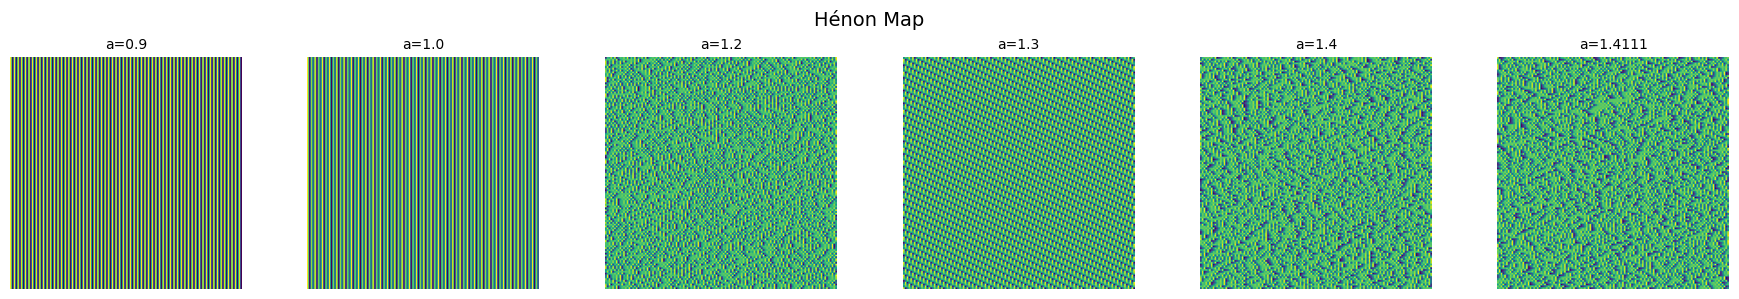

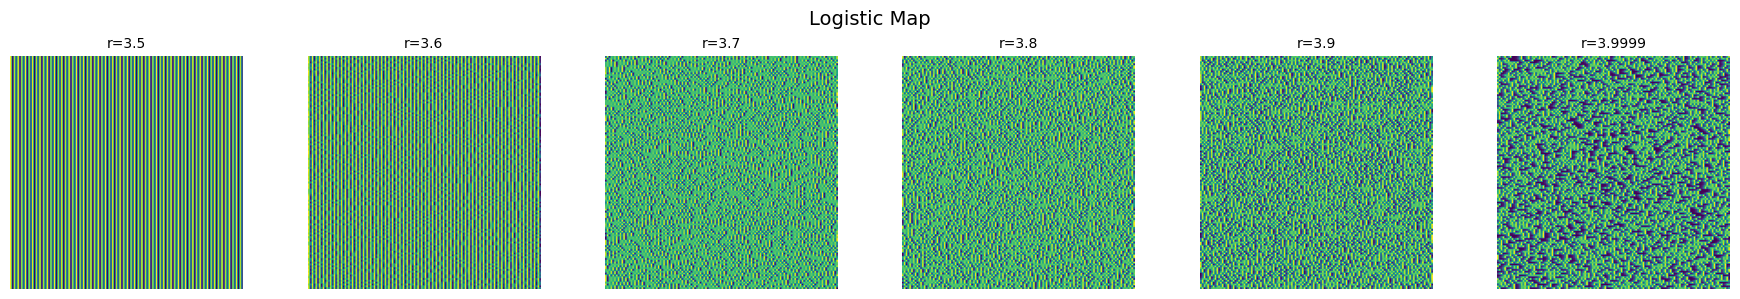

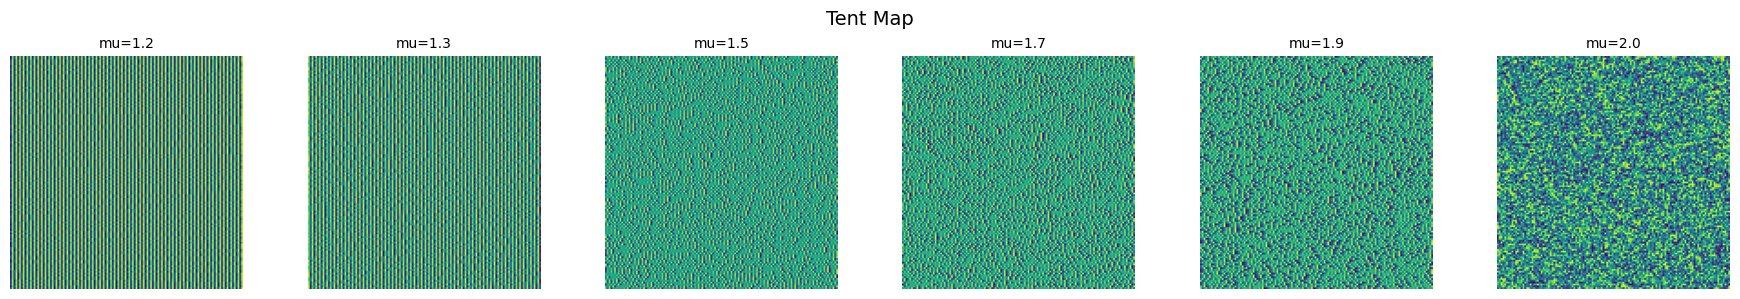

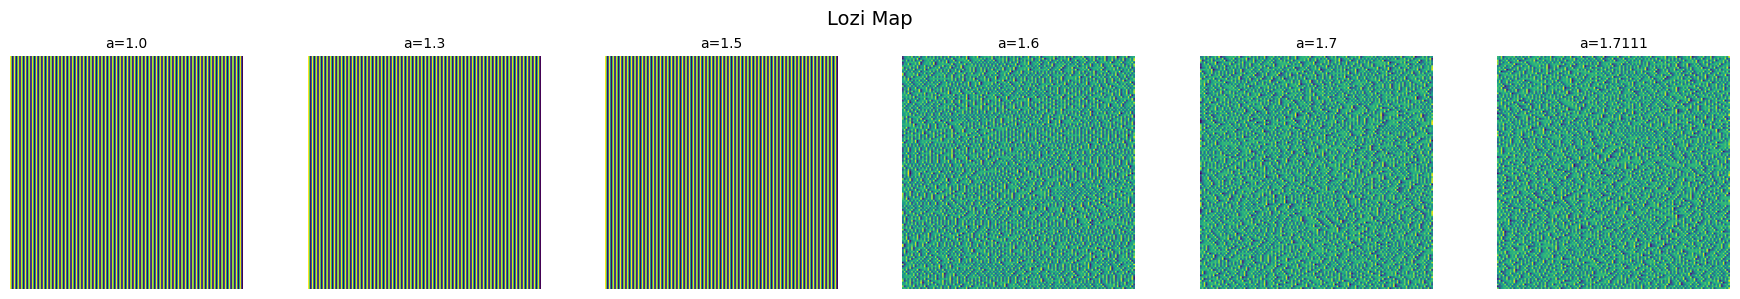

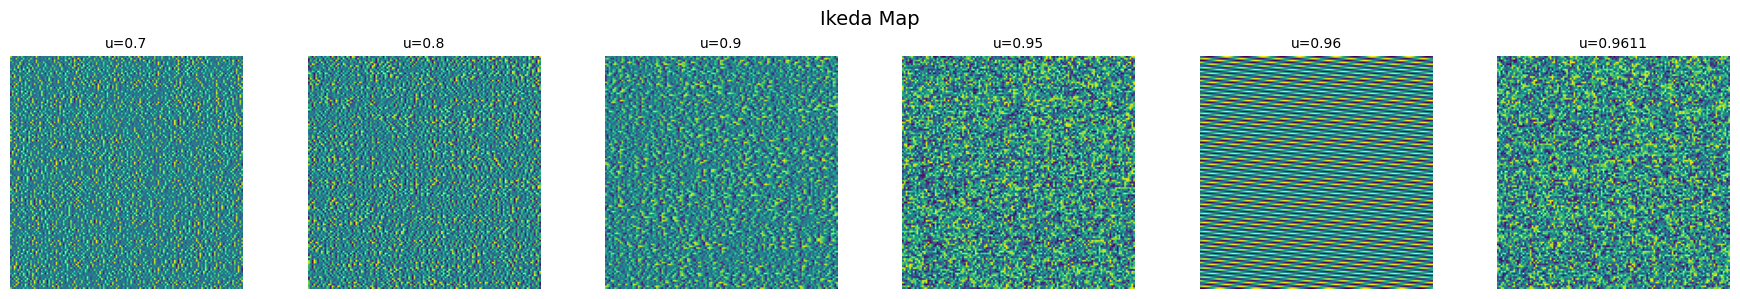

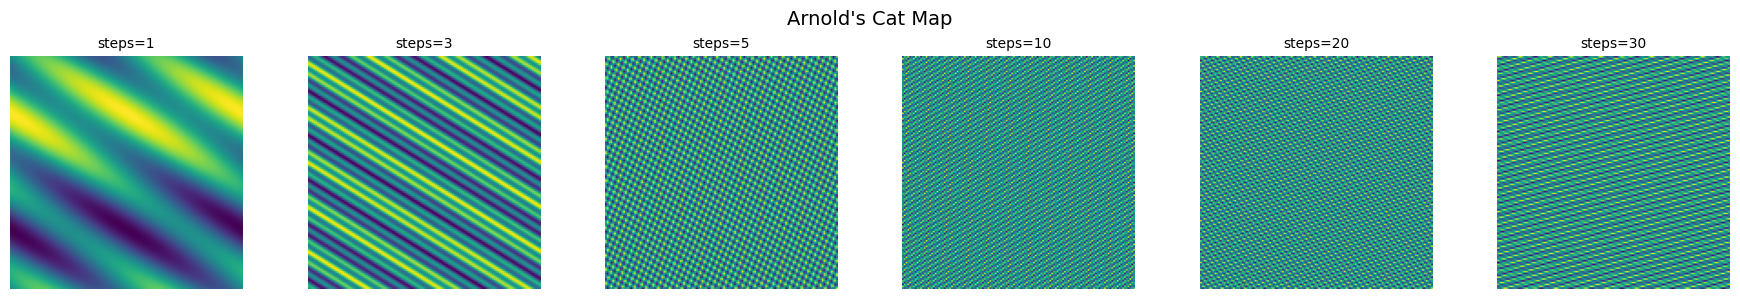

In [7]:
plot_param_exploration(chaotic_images.henon_texture, "a", [0.9, 1.0, 1.2, 1.3, 1.4, 1.4111], {"b": 0.3}, "Hénon Map")
plot_param_exploration(chaotic_images.logistic_texture, "r", [3.5, 3.6, 3.7, 3.8, 3.9, 3.9999], {"x0": 0.5}, "Logistic Map")
plot_param_exploration(chaotic_images.tent_map_texture, "mu", [1.2, 1.3, 1.5, 1.7, 1.9, 2.0], {"x0": 0.1}, "Tent Map")
plot_param_exploration(chaotic_images.lozi_map_texture, "a", [1.0, 1.3, 1.5, 1.6, 1.7, 1.7111], {"b": 0.5}, "Lozi Map")
plot_param_exploration(chaotic_images.ikeda_map_texture, "u", [0.7, 0.8, 0.9, 0.95, 0.96, 0.9611], {"x0": 0.1, "y0": 0.1}, "Ikeda Map")
plot_param_exploration(chaotic_images.arnolds_cat_map_texture, "steps", [1, 3, 5, 10, 20, 30], {}, "Arnold's Cat Map")


In [8]:

configs = [
    ("henon", chaotic_images.henon_texture, "a", [0.9, 1.0, 1.2, 1.3, 1.4, 1.4111], {"b": 0.3}),
    ("logistic", chaotic_images.logistic_texture, "r", [3.5, 3.6, 3.7, 3.8, 3.9, 3.9999], {"x0": 0.5}),
    ("tent", chaotic_images.tent_map_texture, "mu", [1.2, 1.3, 1.5, 1.7, 1.9, 2.0], {"x0": 0.1}),
    ("lozi", chaotic_images.lozi_map_texture, "a", [1.0, 1.3, 1.5, 1.6, 1.7, 1.7111], {"b": 0.5}),
    ("ikeda", chaotic_images.ikeda_map_texture, "u", [0.7, 0.8, 0.9, 0.95, 0.96, 0.9611], {"x0": 0.1, "y0": 0.1}),
    ("arnold", chaotic_images.arnolds_cat_map_texture, "steps", [1, 3, 5, 10, 20, 30], {})
]

image_data_list = []
# Loop and call f for each image
for type_name, func, param_name, param_list, fixed_params in configs:
    for val in param_list:
        kwargs = fixed_params.copy()
        kwargs[param_name] = val
        image = func(**kwargs, image_size=(256, 256))
        info = get_img_info_simple(image, dx=6, dy=1)
        info['image_name'] = type_name
        info['param_name'] = param_name
        info['param_value'] = val
        image_data_list.append(info)
        
        
# Create a DataFrame from the collected data
image_data_df = pd.concat(image_data_list, ignore_index=True)

image_data_df

Smoothness  Curve structure   Entropy  Complexity  Shannon Entropy  \
0     0.666667         0.000000  0.210703    0.207044         0.210703   
1     0.666667         0.000000  0.316042    0.304409         0.316042   
2    -0.141176        -0.135271  0.500192    0.431096         0.500192   
3    -0.190481        -0.285705  0.295765    0.286244         0.295765   
4    -0.083845        -0.089258  0.555445    0.458808         0.555445   
5    -0.079708        -0.095025  0.555677    0.459059         0.555677   
6     0.666667         0.000000  0.210703    0.207044         0.210703   
7     0.089319         0.577347  0.352398    0.334090         0.352398   
8    -0.210365        -0.131411  0.412902    0.382160         0.412902   
9    -0.140423        -0.158816  0.478767    0.428422         0.478767   
10   -0.050027        -0.179577  0.541771    0.461247         0.541771   
11    0.053379        -0.065898  0.630181    0.484584         0.630181   
12    0.110896         0.555771  0.334657    0.318334         0.334657   
13    0.039985         0.626682  0.363168    0.343919         0.363168   
14   -0.201876        -0.133441  0.417460    0.386138         0.417460   
15   -0.110957        -0.145529  0.531731    0.454758         0.531731   
16   -0.032080        -0.119954  0.610961    0.483956         0.610961   
17   -0.002522        -0.008120  0.999159    0.002015         0.999159   
18   -0.001307         0.667974  0.272334    0.264864         0.272334   
19    0.000000         0.666667  0.325077    0.311814         0.325077   
20    0.332026         0.334641  0.342707    0.327197         0.342707   
21   -0.100300        -0.166428  0.532640    0.445170         0.532640   
22   -0.087982        -0.143714  0.583584    0.469444         0.583584   
23   -0.078447        -0.125506  0.589522    0.469831         0.589522   
24   -0.076940        -0.193725  0.636312    0.466033         0.636312   
25   -0.048089        -0.150942  0.682355    0.431824         0.682355   
26    0.021715        -0.071296  0.810179    0.354272         0.810179   
27    0.000554        -0.002768  0.999196    0.001925         0.999196   
28    0.266667         0.199216  0.291926    0.279562         0.291926   
29   -0.002291         0.006105  0.999070    0.002226         0.999070   
30    0.628850         0.035386  0.165811    0.156292         0.165811   
31    0.502637        -0.039031  0.346423    0.315661         0.346423   
32   -0.253410        -0.351957  0.739438    0.441728         0.739438   
33    0.196232         0.224129  0.721318    0.439906         0.721318   
34    0.103945         0.073403  0.765456    0.428490         0.765456   
35   -0.008243        -0.203153  0.647243    0.481885         0.647243   

    Fisher-Shannon Complexity image_name param_name  param_value  
0                1.593651e-05      henon          a       0.9000  
1                4.743232e-05      henon          a       1.0000  
2                3.541166e-01      henon          a       1.2000  
3                6.357678e-10      henon          a       1.3000  
4                2.854943e-01      henon          a       1.4000  
5                2.891330e-01      henon          a       1.4111  
6                1.593651e-05   logistic          r       3.5000  
7                1.170236e-01   logistic          r       3.6000  
8                9.027858e-02   logistic          r       3.7000  
9                6.650304e-02   logistic          r       3.8000  
10               1.067263e-01   logistic          r       3.9000  
11               8.718450e-02   logistic          r       3.9999  
12               2.085945e-01       tent         mu       1.2000  
13               8.397833e-02       tent         mu       1.3000  
14               7.340956e-02       tent         mu       1.5000  
15               1.320456e-01       tent         mu       1.7000  
16               1.130308e-01       tent         mu       1.9000  
17               2.799055e-03       tent         mu       2

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine do

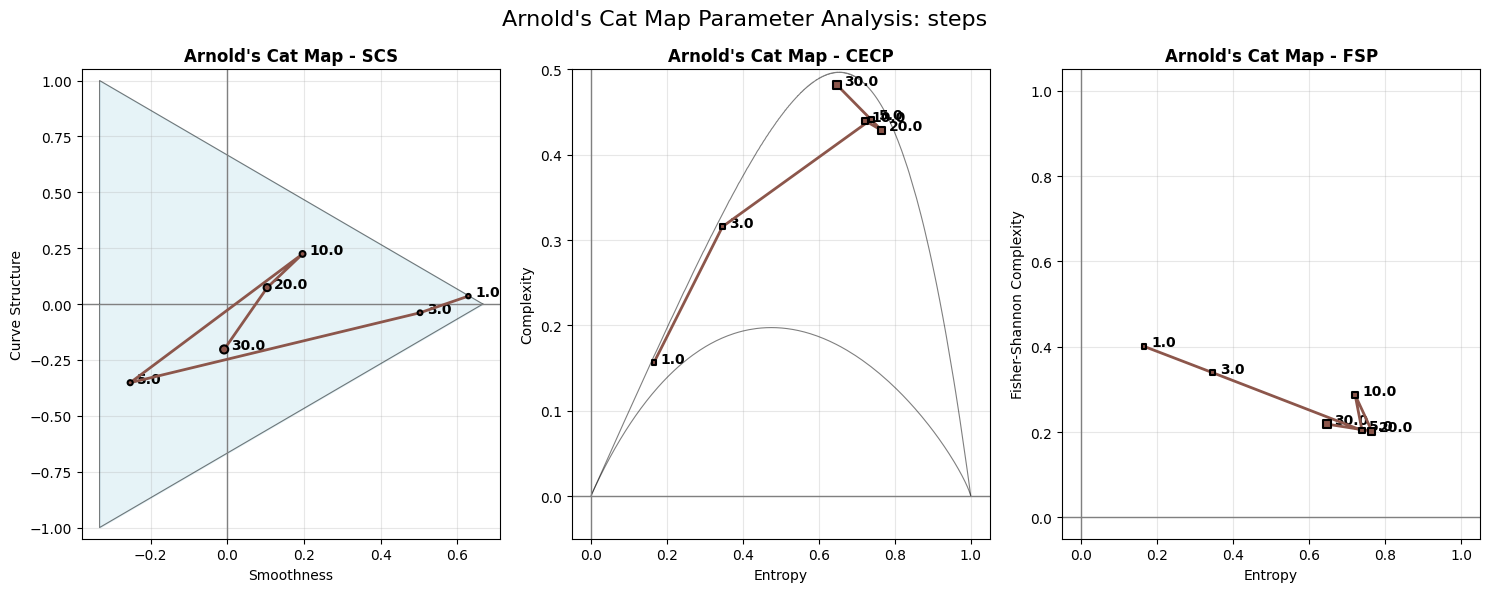

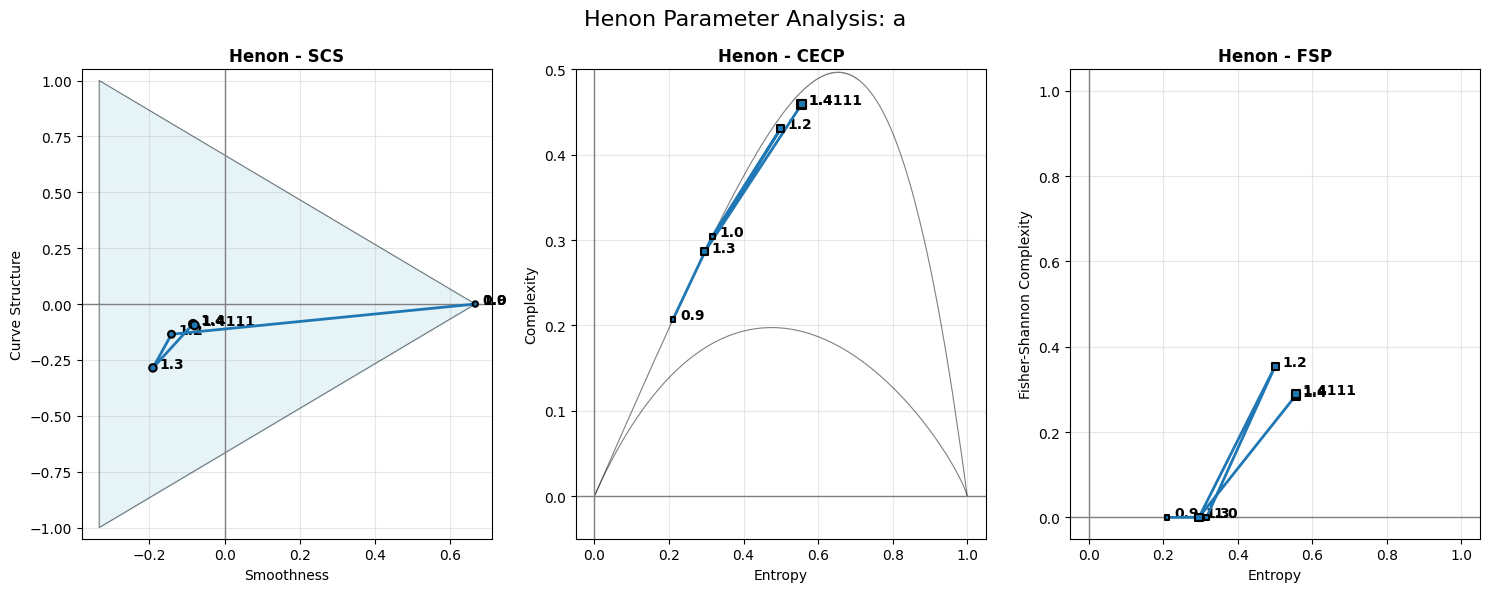

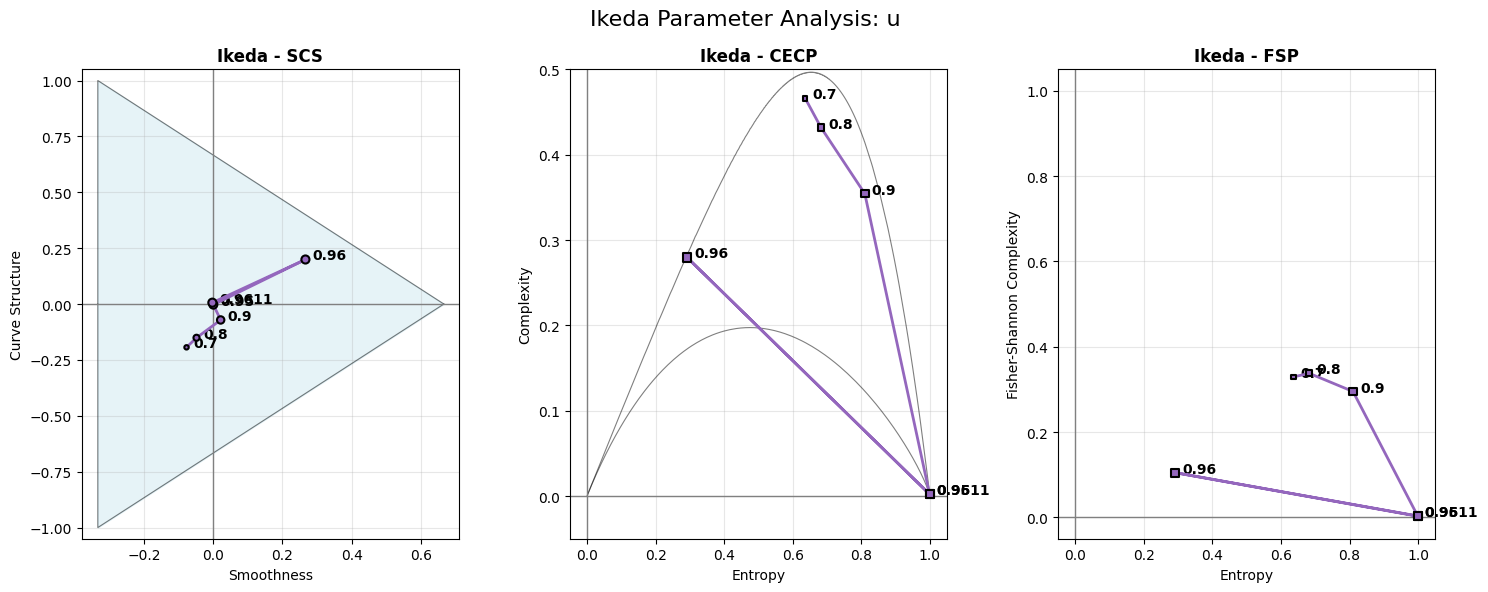

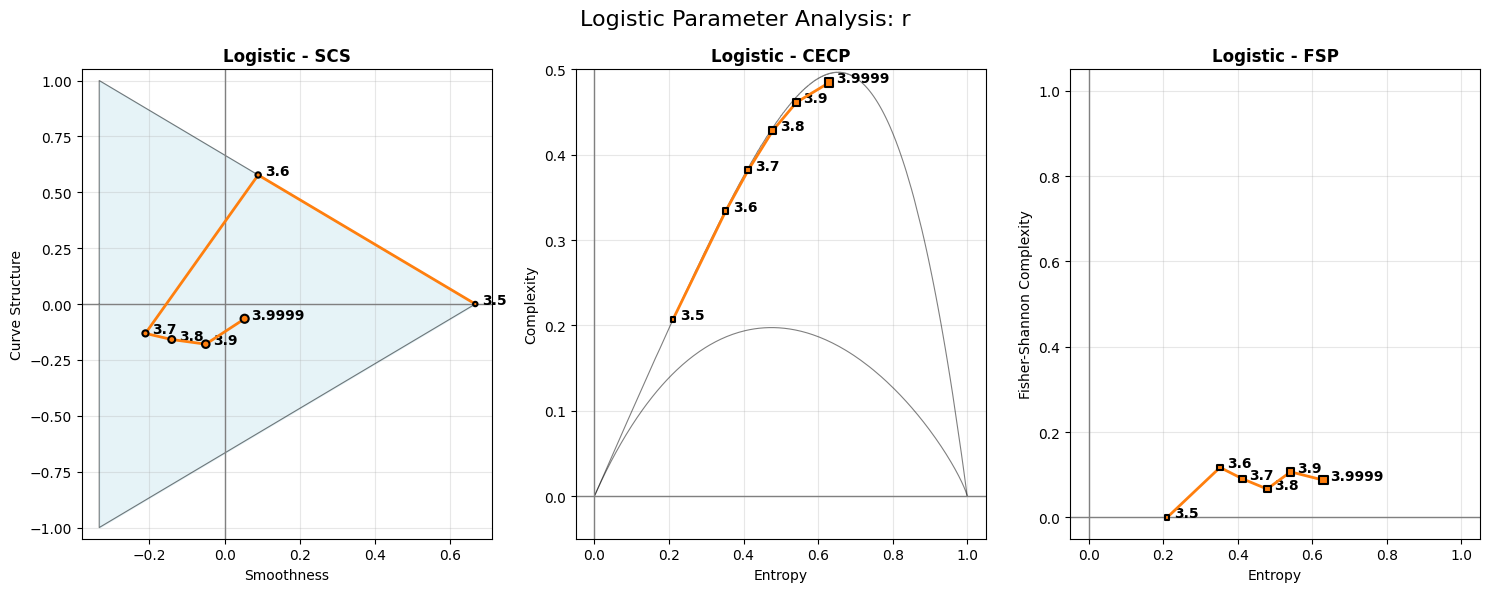

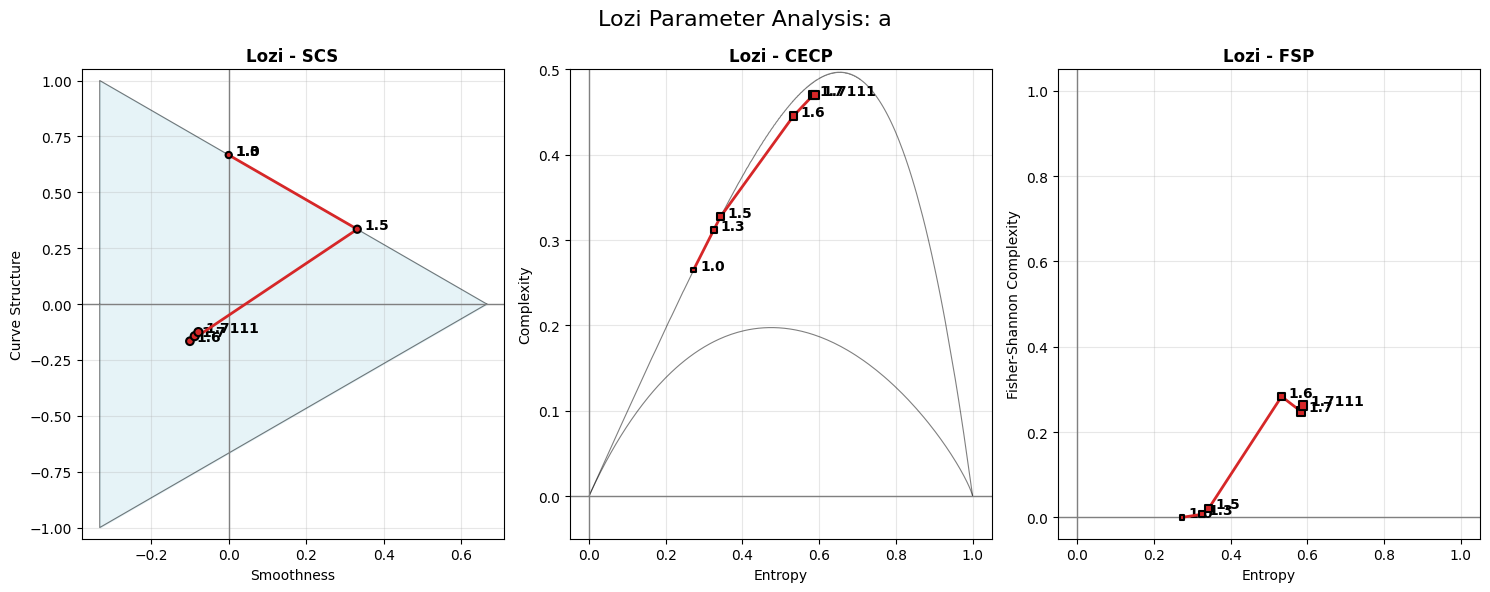

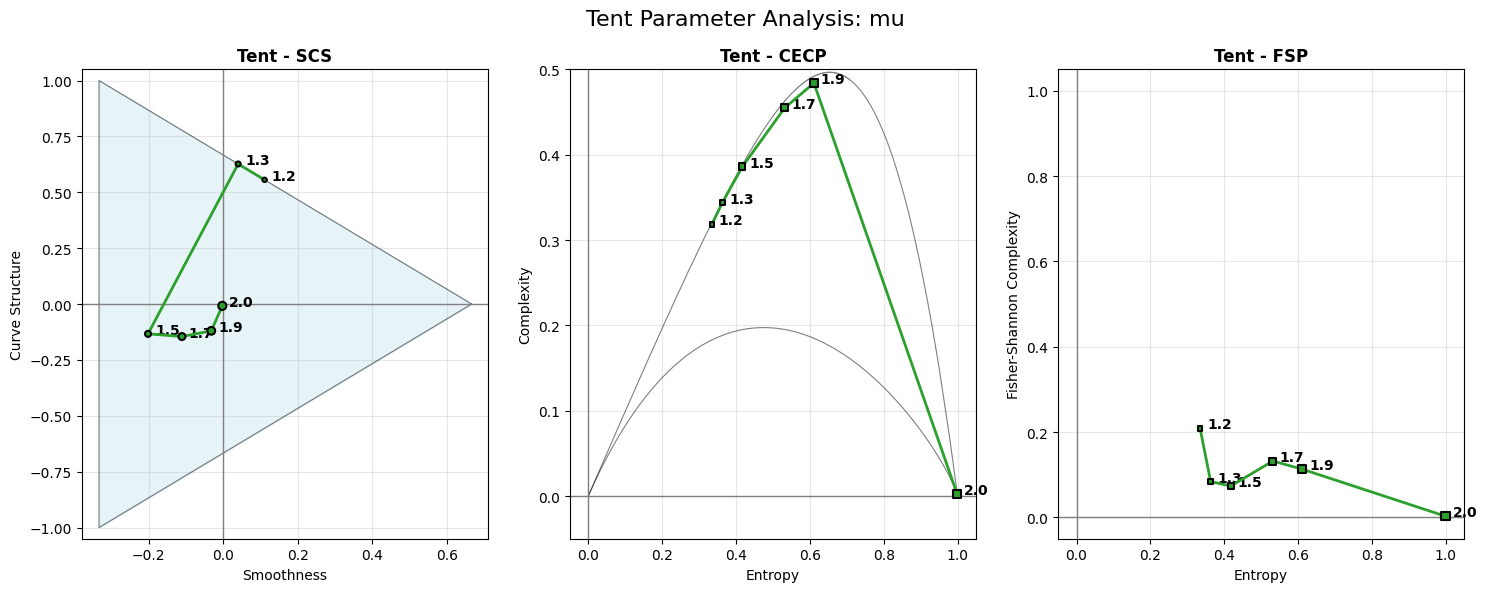

In [9]:
from utils.utils import read_entropy_complexity_limits

import matplotlib.pyplot as plt
import numpy as np

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
df_cont, df_troz = read_entropy_complexity_limits('data/limits/unv/', N=720)

# Load SCSP limits for the smoothness-curve structure plot
df_scs = pd.read_csv('data/limits/SCSP/SCS_limits_steps1000.csv')

# Define colors for each image type
image_colors = {
    'henon': '#1f77b4',      # blue
    'logistic': '#ff7f0e',   # orange
    'tent': '#2ca02c',       # green
    'lozi': '#d62728',       # red
    'ikeda': '#9467bd',      # purple
    'arnold': '#8c564b'      # brown
}

# Define consistent limits for all plots
scs_limits = (-0.3, 0.7, -0.4, 0.7)  # xlim_min, xlim_max, ylim_min, ylim_max
cecp_limits = (0.2, 1.05, 0, 0.4)    # xlim_min, xlim_max, ylim_min, ylim_max
fsp_limits = (-0.05, 1.05, -0.05, 1.05) # xlim_min, xlim_max, ylim_min, ylim_max

# Create a separate figure for each image type
for image_name, group in image_data_df.groupby('image_name'):
    fig, (ax_scs, ax_cecp, ax_fsp) = plt.subplots(1, 3, figsize=(15, 6))
    
    # Sort data by parameter value
    group = group.sort_values('param_value')
    color = image_colors[image_name]
    
    # Format the label
    label = image_name.replace('_', ' ').title()
    if image_name == 'arnold':
        label = "Arnold's Cat Map"
    
    # Calculate marker sizes based on parameter values
    # Scale from 5 to 15 based on min and max parameter values
    param_min = group['param_value'].min()
    param_max = group['param_value'].max()
    marker_sizes = 5 + 12 * (group['param_value'] - param_min) / (param_max - param_min)
    
    # SCS plot with variable marker sizes
    ax_scs.scatter(group['Smoothness'], group['Curve structure'], 
               color=color, s=marker_sizes*2, marker='o', linewidth=1.5, 
               edgecolor='black', zorder=10)
    ax_scs.plot(group['Smoothness'], group['Curve structure'], 
               color=color, linestyle='-', linewidth=2, zorder=5)
    
    # CECP plot with variable marker sizes
    ax_cecp.scatter(group['Entropy'], group['Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_cecp.plot(group['Entropy'], group['Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # FSP plot with variable marker sizes: 'Shannon Entropy' X 'Fisher-Shannon Complexity'
    ax_fsp.scatter(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_fsp.plot(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # Add CECP limits to the CECP plot
    ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8, alpha=0.5)
    ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8, alpha=0.5)
    # ax_scs.fill_between(df_cont['HT'], df_cont['CJT'],  df_troz['CJT'], color='lightblue', alpha=0.3, 
                # label='Valid Region')
    
    # Add SCS limits to the SCS plot
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Superior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.fill_between(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], df_scs['Curve_Structure_Superior'], color='lightblue', alpha=0.3)
    
    
    # Add parameter values as annotations
    for _, row in group.iterrows():
        param_value = str(row['param_value'])
        
        # SCS point annotation
        ax_scs.annotate(f"{param_value}", 
                   xy=(row['Smoothness'], row['Curve structure']),
                   xytext=(5, 0), textcoords='offset points', 
                   fontsize=10, color='black', fontweight='bold')
        
        # CECP point annotation
        ax_cecp.annotate(f"{param_value}", 
                        xy=(row['Entropy'], row['Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
        
        # FSP point annotation
        ax_fsp.annotate(f"{param_value}", 
                        xy=(row['Shannon Entropy'], row['Fisher-Shannon Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
    
    # Set axis labels and limits
    ax_scs.set_title(f"{label} - SCS", fontweight='bold')
    ax_scs.set_xlabel('Smoothness')
    ax_scs.set_ylabel('Curve Structure')
    ax_scs.set_xlim(-0.38, 0.71)
    ax_scs.set_ylim(-1.05, 1.05)
    
    ax_cecp.set_title(f"{label} - CECP", fontweight='bold')
    ax_cecp.set_xlabel('Entropy')
    ax_cecp.set_ylabel('Complexity')
    ax_cecp.set_xlim(-0.05, 1.05)
    ax_cecp.set_ylim(-0.05, 0.5)
    
    ax_fsp.set_title(f"{label} - FSP", fontweight='bold')
    ax_fsp.set_xlabel('Entropy')
    ax_fsp.set_ylabel('Fisher-Shannon Complexity')
    ax_fsp.set_xlim(-0.05, 1.05)
    ax_fsp.set_ylim(-0.05, 1.05)
    
    # Add grid and reference lines
    ax_scs.grid(True, alpha=0.3)
    ax_scs.axhline(y=0, lw=1, color='gray')
    ax_scs.axvline(x=0, lw=1, color='gray')
    ax_cecp.grid(True, alpha=0.3)
    ax_cecp.axhline(y=0, lw=1, color='gray')
    ax_cecp.axvline(x=0, lw=1, color='gray')
    ax_fsp.grid(True, alpha=0.3)
    ax_fsp.axhline(y=0, lw=1, color='gray')
    ax_fsp.axvline(x=0, lw=1, color='gray')
    
    # Add parameter name info
    param_name = group['param_name'].iloc[0]
    fig.suptitle(f"{label} Parameter Analysis: {param_name}", fontsize=16)
    
    plt.tight_layout()
    # plt.savefig(f'results/{image_name}_parameter_analysis.png', bbox_inches='tight', dpi=300)
    plt.show()
